# System Simulation
### Ali Kamil Yıldırım 2018402021


 **a) Consider the pdf of standard Normal random variable z, which is known, but 
impossible to integrate analytically. Using the simulation method discussed in 
class, approximately compute the integral of this function in the interval (0.56, 2.4). 
Use the random generator of Excel, R or any other programming language and do 
the simulation for 1000 random number pairs. At the end, how well do you think 
is the approximation?**

Just for good measure, below is the plot for the standart norm. dist.

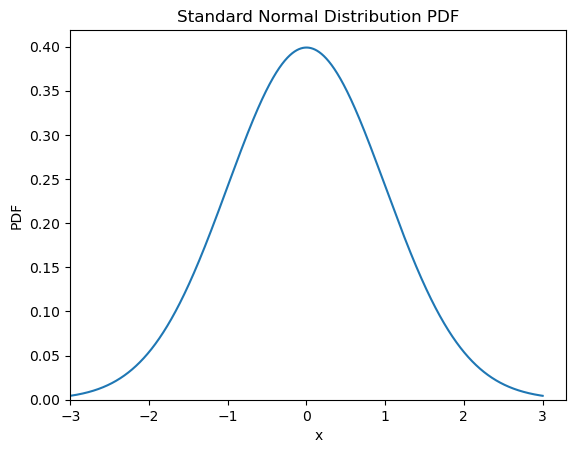

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform
import random

x = np.linspace(-3, 3, 10000000)

# PDF for the standard normal distribution
pdf = norm.pdf(x) 

# Plotting
plt.plot(x, pdf)
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Standard Normal Distribution PDF')
plt.ylim(0)
plt.xlim(-3)
plt.show()

In [2]:
norm.pdf(0.56)

0.34104578863035256

In [3]:
norm.pdf(2.4)

0.0223945302948429

In [4]:
random.seed(42)

min_value_x = 0.56
max_value_x = 2.4

min_value_y = 0
max_value_y = norm.pdf(0.56) # because it is the larger value and will be used to calculate the area of rectangle

# We are asked to generate 1000 pairs
num_pairs = 1000
random_pairs = [(random.uniform(min_value_x, max_value_x), random.uniform(min_value_y, max_value_y)) for _ in range(num_pairs)]

In [5]:
count = sum(1 for i in random_pairs if i[1] < norm.pdf(i[0]))
count

427

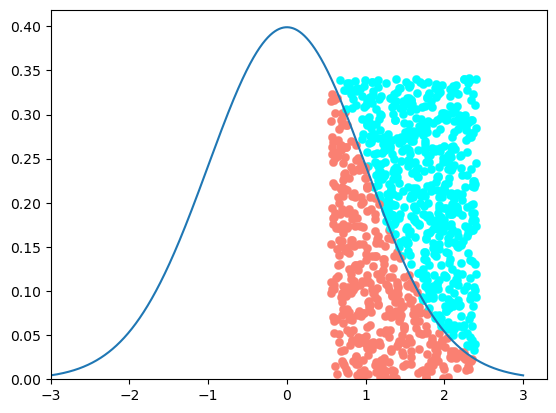

In [6]:
plt.plot(x, pdf)

for i in random_pairs:
    if i[1] < norm.pdf(i[0]):
        plt.scatter(i[0], i[1], color = "salmon", linewidth=0.2)
    else:
        plt.scatter(i[0], i[1], color = "cyan", linewidth=0.2)
          
plt.ylim(0)
plt.xlim(-3)
plt.show()

In [7]:
are_of_the_rectangle = (2.4 - 0.56) * norm.pdf(0.56)

In [8]:
area_under_curve = count / num_pairs * are_of_the_rectangle
area_under_curve

0.26795285521109535

Checking the actual value for the area

In [9]:
cdf_lower = norm.cdf(.56)
cdf_upper = norm.cdf(2.4)

# Calculate the area under the curve
area_under_curve_actual = cdf_upper - cdf_lower

print(f"Area under the standard normal distribution between {min_value_x} and {max_value_x} is {area_under_curve_actual}")

Area under the standard normal distribution between 0.56 and 2.4 is 0.2795421829244309


Let's compare the actual and the approximate values

In [10]:
(area_under_curve-area_under_curve_actual) * 100/area_under_curve_actual

-4.1458242874451985

We are 4 percent off, which is decent given that we only generated 1000 pairs.


**b) The famous central limit theorem in statistics states that if you take the sum of 
N identical independent random variables, the sum would be Normally distributed, 
if N is large enough. If we apply this to (say) 10 independent U(0,1) random 
variables, then the sum (Y) should be Normal(5, 0.83), since the mean of U(0,1) is 
0.5 and its variance is 1/12. Write a computer program to generate 750 such Y 
values. To see if the theorem works, estimate the mean and variance of Y, and plot 
its histogram (using a suitable number of classes)**

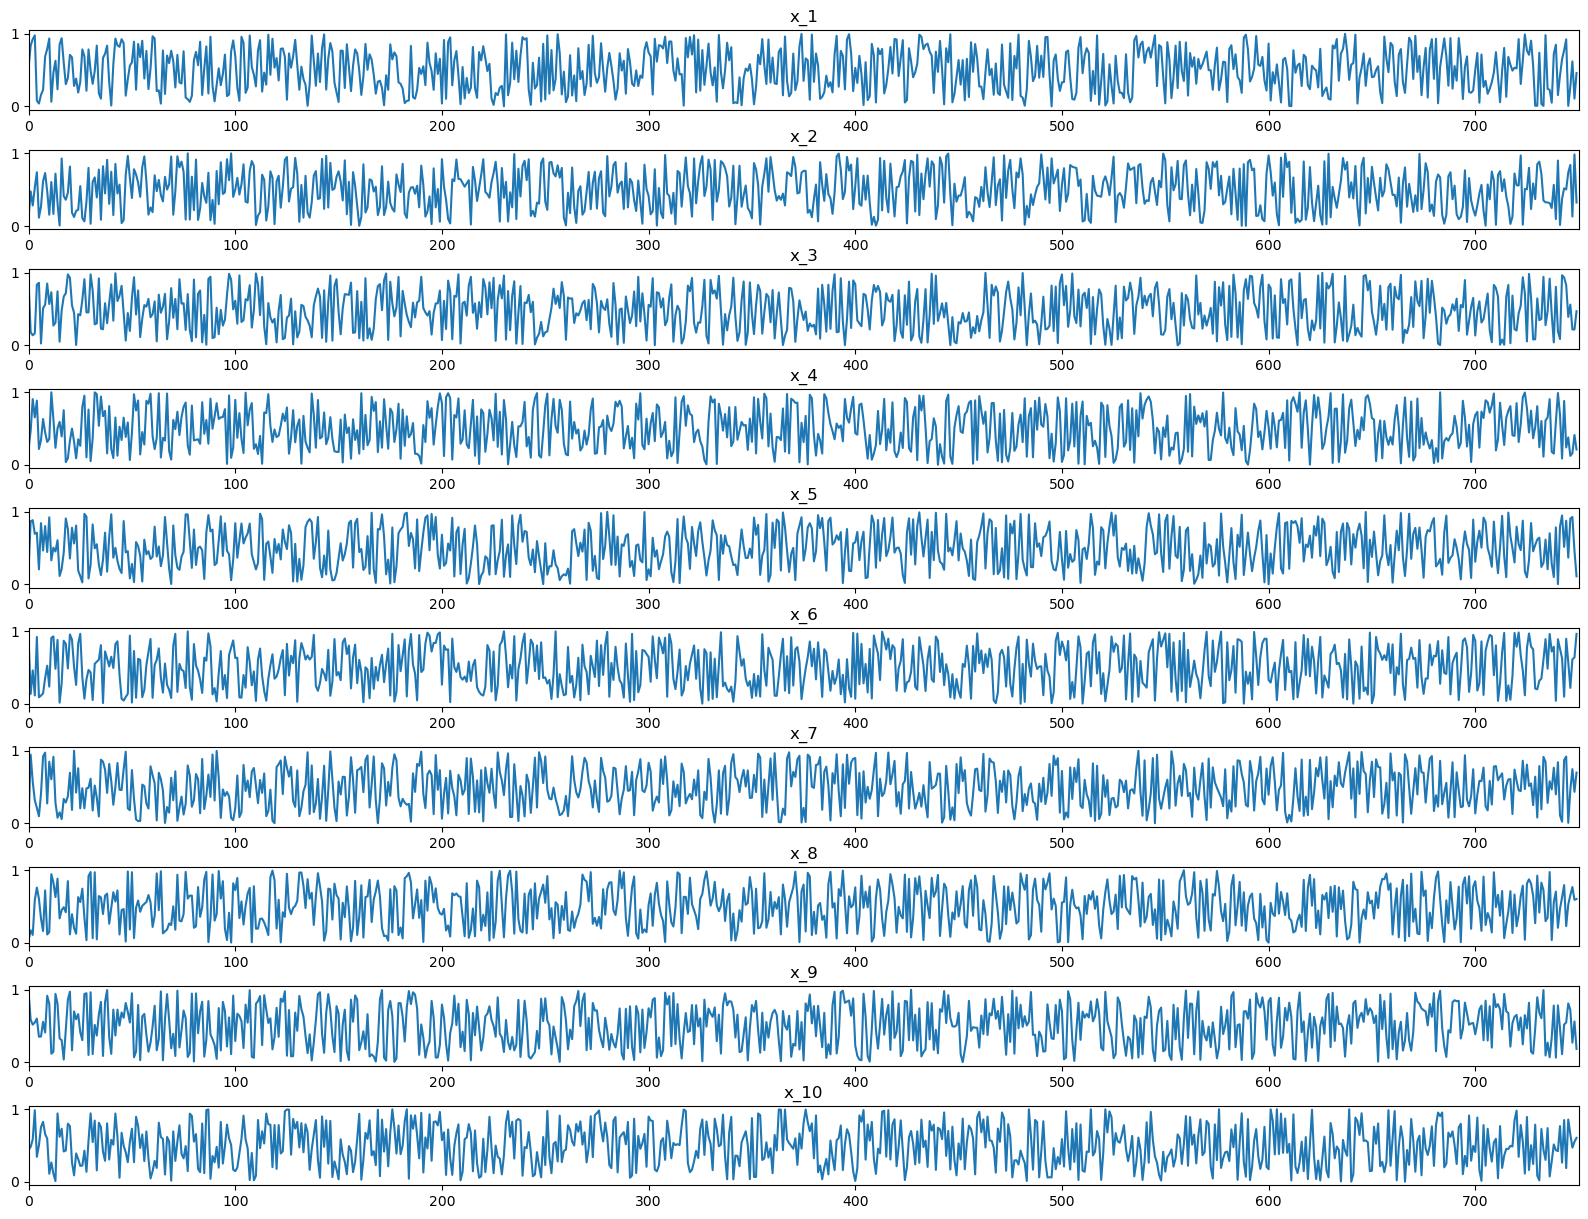

In [23]:
random.seed(40)

x_arrays = [np.random.uniform(0, 1, 750) for _ in range(10)]


fig, axes = plt.subplots(10, 1, figsize=(20, 15))

for i, x in enumerate(x_arrays, start=1):
    ax.plot(x, label=f'x_{i}')

for i, ax in enumerate(axes.flat):
    x = x_arrays[i]
    ax.plot(x)
    ax.set_title(f'x_{i + 1}')
    ax.set_xlim(0, 750)
    
plt.subplots_adjust(hspace=0.5)
plt.show()

In [24]:
y = np.sum(x_arrays, axis=0)

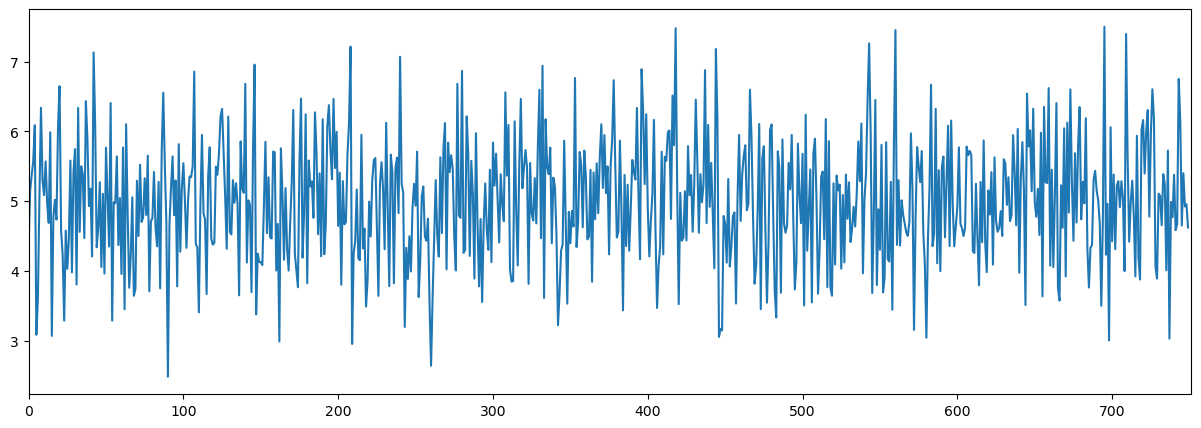

In [33]:
plt.figure(figsize=(15, 5))
plt.xlim(0, 751)
plt.plot(y);

In [34]:
np.mean(y)

4.998046223728909

In [35]:
np.std(y)

0.8666603309144515

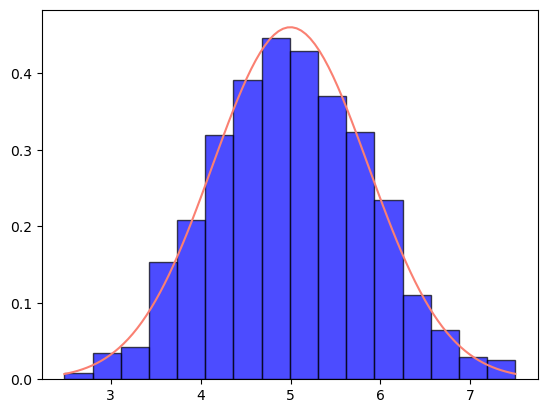

In [52]:

# Calculate the mean and standard deviation of Y
mean_y = np.mean(y)
std_dev_y = np.std(y)
x = np.linspace(y.min(), y.max(), 100)
# Calculate the PDF values for the normal distribution
pdf_values = norm.pdf(x, loc=mean_y, scale=std_dev_y)

# Plot the normal distribution curve
plt.plot(x, pdf_values, color= "salmon")



plt.hist(y, bins=16, density=True, alpha=0.7, color='blue', edgecolor='black');

The sum (Y) was expected to be Normal(5, 0.83). Our results show us that the mean is 4.998046 and the standart deviation is 0.866660. 

The histogram above shows that the sum Y is distributed close to the normal distribution.